# **BERT (Bidirectional Encoder Representation from Transormers)**

BERT (Bidirectional Encoder Representations from Transformers) is a transformer-based model introduced by Google in 2018.  
It is designed to deeply understand the context of words in a sentence by looking at them **bidirectionally** (from both left and right context simultaneously).  

Unlike traditional language models that process text either left-to-right or right-to-left, BERT uses a **masked language modeling** (MLM) objective, where some words in the input are masked and the model learns to predict them using the surrounding context.  

BERT is pre-trained on large corpora such as Wikipedia and BookCorpus, and then fine-tuned on downstream tasks like:

- Text classification (sentiment analysis, topic classification)
- Named Entity Recognition (NER)
- Question Answering
- Next Sentence Prediction
- Sentence similarity tasks

The model’s architecture is based on the Transformer encoder stack, making it powerful for capturing contextual embeddings of text.  

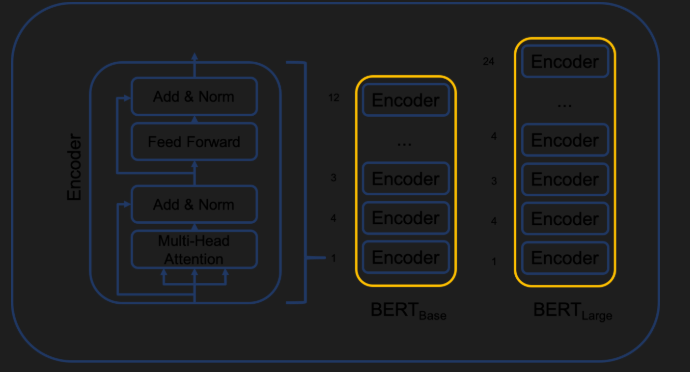

## **Extracting contextual word embeddings by using BERT**

* BERT generates **contextual word embeddings**, meaning each word’s vector representation depends on its surrounding context.  
* This is different from static embeddings like Word2Vec or GloVe, where each word always has the same vector.
* We will use the **transformers library** provided by huggingface, to use their pretrained models.

In [3]:
# importing libraries

from transformers import BertTokenizer, BertModel
import torch

import warnings
warnings.filterwarnings('ignore')

In [4]:
# loading pretrained bert model and tokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [5]:
text1 = "Apple is a healthy fruit"
text2 = "Apple company launches its new iphone"

In [6]:
inputs1 = tokenizer(text1, return_tensors='pt')
inputs2 = tokenizer(text2, return_tensors='pt')

In [7]:
for key, val in inputs1.items():
  print(f'{key}: {val.numpy()}')

input_ids: [[ 101 6207 2003 1037 7965 5909  102]]
token_type_ids: [[0 0 0 0 0 0 0]]
attention_mask: [[1 1 1 1 1 1 1]]


101 -- `<start>`

102 -- `<sep>`

In [8]:
with torch.no_grad():
  outputs1 = model(**inputs1)
  outputs2 = model(**inputs2)

In [9]:
last_hidden_state1 = outputs1.last_hidden_state
last_hidden_state2 = outputs2.last_hidden_state

print(f"shape of contextual embeddings for text1: {last_hidden_state1.shape}")
print(f"shape of contextual embeddings for text2: {last_hidden_state2.shape}")

shape of contextual embeddings for text1: torch.Size([1, 7, 768])
shape of contextual embeddings for text2: torch.Size([1, 8, 768])


(batchsize, seq_len, embed_dim)

In [10]:
print(f"word embedding for first token <start>: {last_hidden_state1[0][0]}")

word embedding for first token <start>: tensor([-3.8243e-01,  9.9160e-02, -2.3222e-01,  3.0045e-02, -3.7249e-01,
        -1.6551e-01,  4.1333e-01,  7.5053e-01, -8.3681e-02, -3.4306e-01,
         7.4596e-02, -2.0310e-01,  1.7866e-01,  3.0139e-01, -4.1360e-01,
        -3.2434e-01,  1.2690e-01,  6.2166e-01,  5.2649e-01, -8.6186e-02,
         1.0111e-01, -4.2101e-01, -6.7290e-02, -4.5928e-02,  4.8140e-01,
        -4.0780e-01, -1.2411e-01,  1.0189e-01,  3.6133e-01,  9.7745e-03,
        -1.9910e-02,  5.3887e-01,  2.2005e-02, -9.0729e-02,  4.6966e-01,
        -2.2140e-03,  2.5185e-01, -8.2188e-02,  2.7214e-01,  3.5807e-01,
         2.3008e-01,  2.7417e-01,  4.3120e-01,  2.7192e-02, -2.4521e-01,
        -3.8486e-01, -2.5795e+00,  3.1118e-01, -3.5311e-01, -3.2100e-01,
         3.5157e-01,  1.1766e-01,  1.8718e-01,  1.8709e-01,  1.6952e-01,
         4.0638e-01, -4.7641e-01,  8.0138e-01,  4.0591e-01,  1.6431e-01,
        -1.3710e-01, -2.7393e-01, -8.8892e-02,  3.3694e-01,  1.8697e-01,
         2.

In [11]:
# checking contextual similarity
from sklearn.metrics.pairwise import cosine_similarity

# for apple and fruit for 1st sentence
embed_11 = last_hidden_state1[0][1] # apple
embed_12 = last_hidden_state1[0][5] # fruit

print(f"similarity between apple and fruit in text 1: {cosine_similarity(embed_11.reshape(1,-1), embed_12.reshape(1,-1))[0][0]:.4f}")

# for apple and company for 2nd sentence

embed_21 = last_hidden_state2[0][1] # apple
embed_22 = last_hidden_state2[0][2] # company


print(f"similarity between apple and company in text 2: {cosine_similarity(embed_21.reshape(1,-1), embed_22.reshape(1,-1))[0][0]:.4f}")

similarity between apple and fruit in text 1: 0.4084
similarity between apple and company in text 2: 0.3118


We can observe the similarity

In [12]:
# for apple in text 1 and company in text2
print(f"similarity between apple in text 1 and company in text2: {cosine_similarity(embed_11.reshape(1,-1), embed_22.reshape(1,-1))[0][0]:.4f}")

# for apple in text 2 and fruit in text1
print(f"similarity between apple in text 2 and fruit in text1: {cosine_similarity(embed_21.reshape(1,-1), embed_12.reshape(1,-1))[0][0]:.4f}")

similarity between apple in text 1 and company in text2: 0.1220
similarity between apple in text 2 and fruit in text1: 0.2166


We can observe that
* The apple from text 1 and company from text2 are less similar (from previous comparision)
* The apple from text 2 and fruit from text 1 are less similar

## **Sentiment Analysis using BERT**

It is a **sentence level classification**

Sentiment analysis, or opinion mining, is a Natural Language Processing (NLP) technique that identifies and extracts the emotional tone of text to classify it as positive, negative, or neutral.  
It's used by companies to understand public opinion, track brand perception, and make data-driven decisions by analyzing large volumes of text from sources like customer reviews, social media, and surveys

In [3]:
# loading libraries

from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [2]:
# loading pretrained tokenizer and model

model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

In [15]:
# inference on text

text1 = "I love this product"
text2 = "I hate this product"

inputs1 = tokenizer(text1, return_tensors='pt')
inputs2 = tokenizer(text2, return_tensors = 'pt')

print("Tokens for text1:")
for key, val in inputs1.items():
  print(f"{key} - {val}")
print("\nTokens for text2:")
for key, val in inputs2.items():
  print(f"{key} - {val}")

Tokens for text1:
input_ids - tensor([[  101,   151, 11157, 10372, 20058,   102]])
token_type_ids - tensor([[0, 0, 0, 0, 0, 0]])
attention_mask - tensor([[1, 1, 1, 1, 1, 1]])

Tokens for text2:
input_ids - tensor([[  101,   151, 39487, 10372, 20058,   102]])
token_type_ids - tensor([[0, 0, 0, 0, 0, 0]])
attention_mask - tensor([[1, 1, 1, 1, 1, 1]])


In [16]:
# forward pass
with torch.no_grad():
  outputs1 = model(**inputs1)
  outputs2 = model(**inputs2)

In [17]:
# getting predictions

logits1 = outputs1.logits
logits2 = outputs2.logits

print(f"Logits for output1: {logits1}")
print(f"Logits for output2: {logits2}")

Logits for output1: tensor([[-2.2812, -2.5279, -0.8921,  1.4425,  3.4457]])
Logits for output2: tensor([[ 4.1289,  1.4909, -0.6813, -2.3573, -1.8685]])


In [18]:
classification = {1:"Very negative", 2:"negative", 3:"neutral", 4: "positive", 5: "very positive"}

In [19]:
predicted_rating_1 = torch.argmax(logits1, dim=-1)
preditec_rating_2 = torch.argmax(logits2, dim=-1)

print(f"Text 1: {text1}")
print(f"Predicted rating: {predicted_rating_1.item()+1}")
print(f"Sentiment: {classification[predicted_rating_1.item()+ 1]}")
print(f"\nText 2: {text2}")
print(f"Predicted rating: {preditec_rating_2.item()+1}")
print(f"Sentiment: {classification[preditec_rating_2.item()+ 1]}")

Text 1: I love this product
Predicted rating: 5
Sentiment: very positive

Text 2: I hate this product
Predicted rating: 1
Sentiment: Very negative
